In [59]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [60]:
# blocks in Mierendorff but no relevant buildings
irrelevant = [ '019017', '019708', '019609']
# blocks that are on Mierendorff but not considered in the study
outer_mierendorff = ['019609', '019017', '09808', '019901', '020902', '019708']

<Axes: >

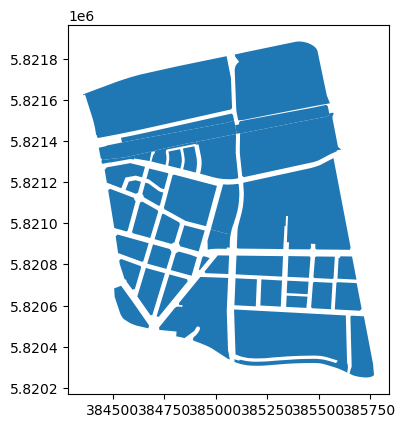

In [61]:

# Load shapefile
shapefile_path = r"C:\Users\felix\Programmieren\cea_berlin\auxillary\00_block_shape.shp"
shape_data = gpd.read_file(shapefile_path)
shape_data.plot()

In [62]:
shape_data = shape_data[~shape_data['blknr'].isin(outer_mierendorff)]

shape_data['blknr'] = shape_data['blknr'].astype('int64')


c:\ProgramData\anaconda3\envs\cea\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [63]:
energy_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\dh_berlin.xls')    
energy_data["blknr"] = energy_data["Blocknummer"]
energy_data

,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],blknr
0,1001,-,-,-,1001
1,1002,-,-,-,1002
2,1007,2568.032,2786.803,2684.242,1007
3,1010,-,-,-,1010
4,1012,1305.403,1432.731,1444.354,1012
...,...,...,...,...,...
16385,195634,-,-,-,195634
16386,195635,-,-,-,195635
16387,195901,-,-,-,195901
16388,195902,-,-,-,195902


In [64]:
district_data = shape_data.merge(energy_data, on="blknr")


In [65]:
# Create a new column in 'merged_data' with categorical data
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]
district_data['category'] = pd.cut(district_data['Fernwärmeverbrauch 2020 [MWh]'].replace('-', 0), bins, include_lowest=True)
district_data

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],category
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",19033,-,-,-,"(-0.001, 500.0]"
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",19692,2896.681,3684.376,2229.792,"(2000.0, 2500.0]"
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",19742,-,-,-,"(-0.001, 500.0]"
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",19759,-,-,-,"(-0.001, 500.0]"
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",19760,-,-,-,"(-0.001, 500.0]"
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",20020,-,-,-,"(-0.001, 500.0]"
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",20021,-,-,-,"(-0.001, 500.0]"
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",20022,-,-,-,"(-0.001, 500.0]"
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",20023,-,-,851.346,"(500.0, 1000.0]"
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",20027,2035.49,2359.61,2184.202,"(2000.0, 2500.0]"


Text(0.5, 1.0, 'Fernwärmeverbrauch 2022 [MWh]')

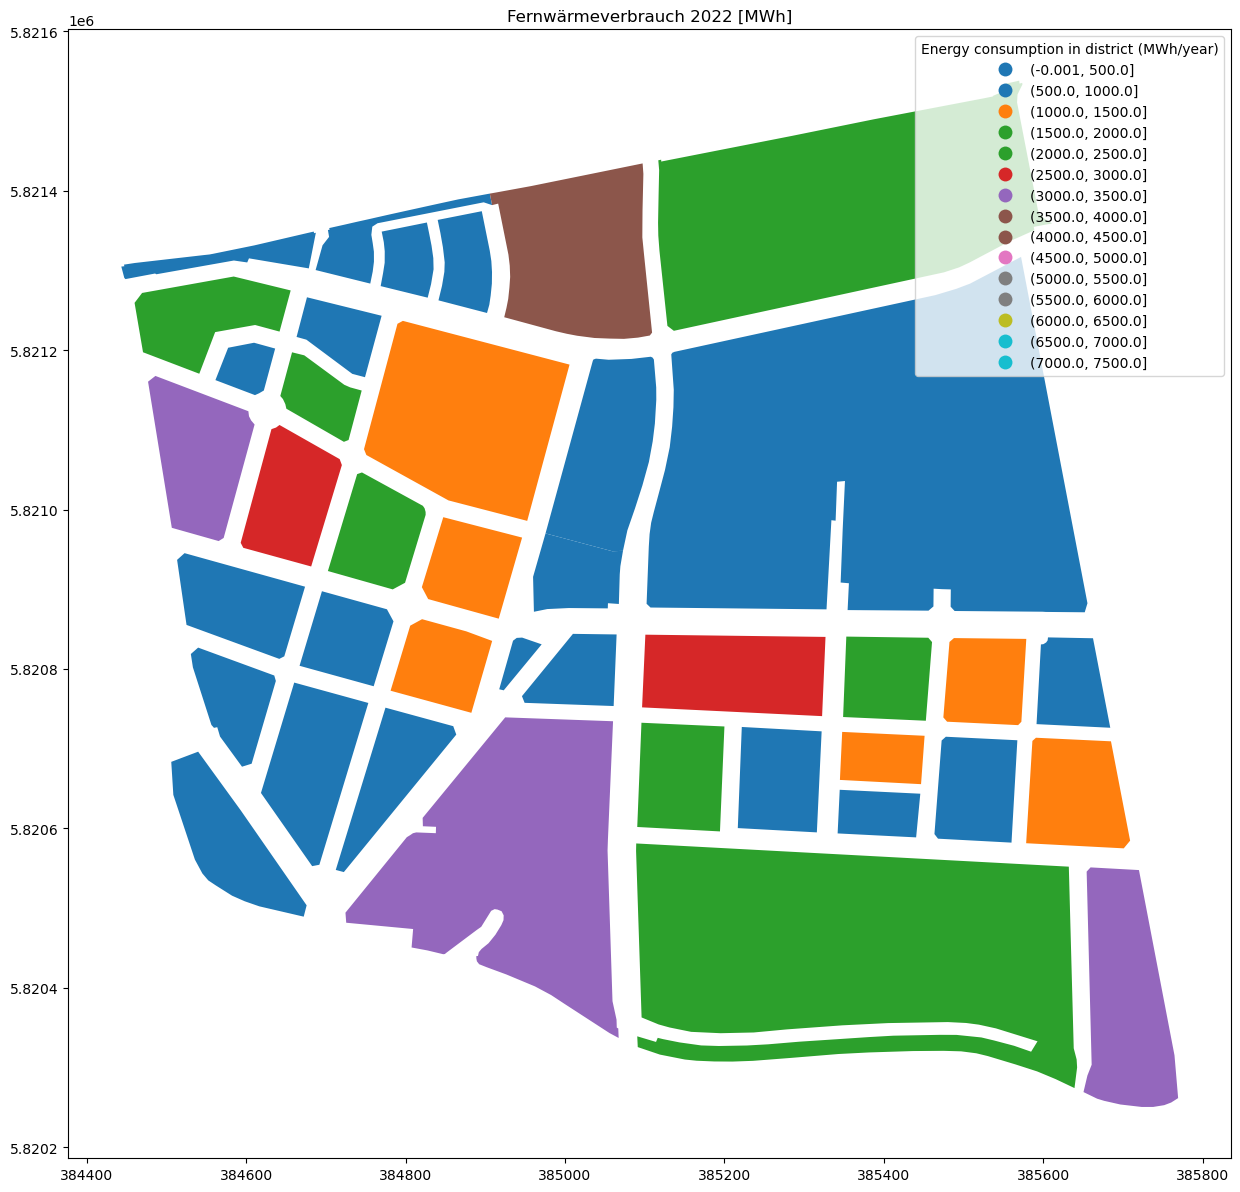

In [66]:
# Plotting the map with a colormap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
district_data.plot(column='category', ax=ax, legend=True,
                    legend_kwds={'title': "Energy consumption in district (MWh/year)"})
plt.title('Fernwärmeverbrauch 2022 [MWh]')

In [67]:
# Add function, that plots based on data availabilty 
# If data is there, color differently 
# for example one year, to two yers , to three years 



In [68]:
columns_to_check = [
        "Fernwärmeverbrauch 2022 [MWh]",
        "Fernwärmeverbrauch 2021 [MWh]",
        "Fernwärmeverbrauch 2020 [MWh]"
    ]

for column in columns_to_check:
        district_data[column] = pd.to_numeric(district_data[column], errors='coerce')

district_data["valid_entries"] = district_data[columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
district_data

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],category,valid_entries
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",19033,NaN,NaN,NaN,"(-0.001, 500.0]",0
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",19692,2896.681,3684.376,2229.792,"(2000.0, 2500.0]",3
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",19742,NaN,NaN,NaN,"(-0.001, 500.0]",0
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",19759,NaN,NaN,NaN,"(-0.001, 500.0]",0
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",19760,NaN,NaN,NaN,"(-0.001, 500.0]",0
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",20020,NaN,NaN,NaN,"(-0.001, 500.0]",0
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",20021,NaN,NaN,NaN,"(-0.001, 500.0]",0
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",20022,NaN,NaN,NaN,"(-0.001, 500.0]",0
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",20023,NaN,NaN,851.346,"(500.0, 1000.0]",1
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",20027,2035.490,2359.610,2184.202,"(2000.0, 2500.0]",3


Text(0.5, 1.0, 'Number of valid Data Reportings for district heating')

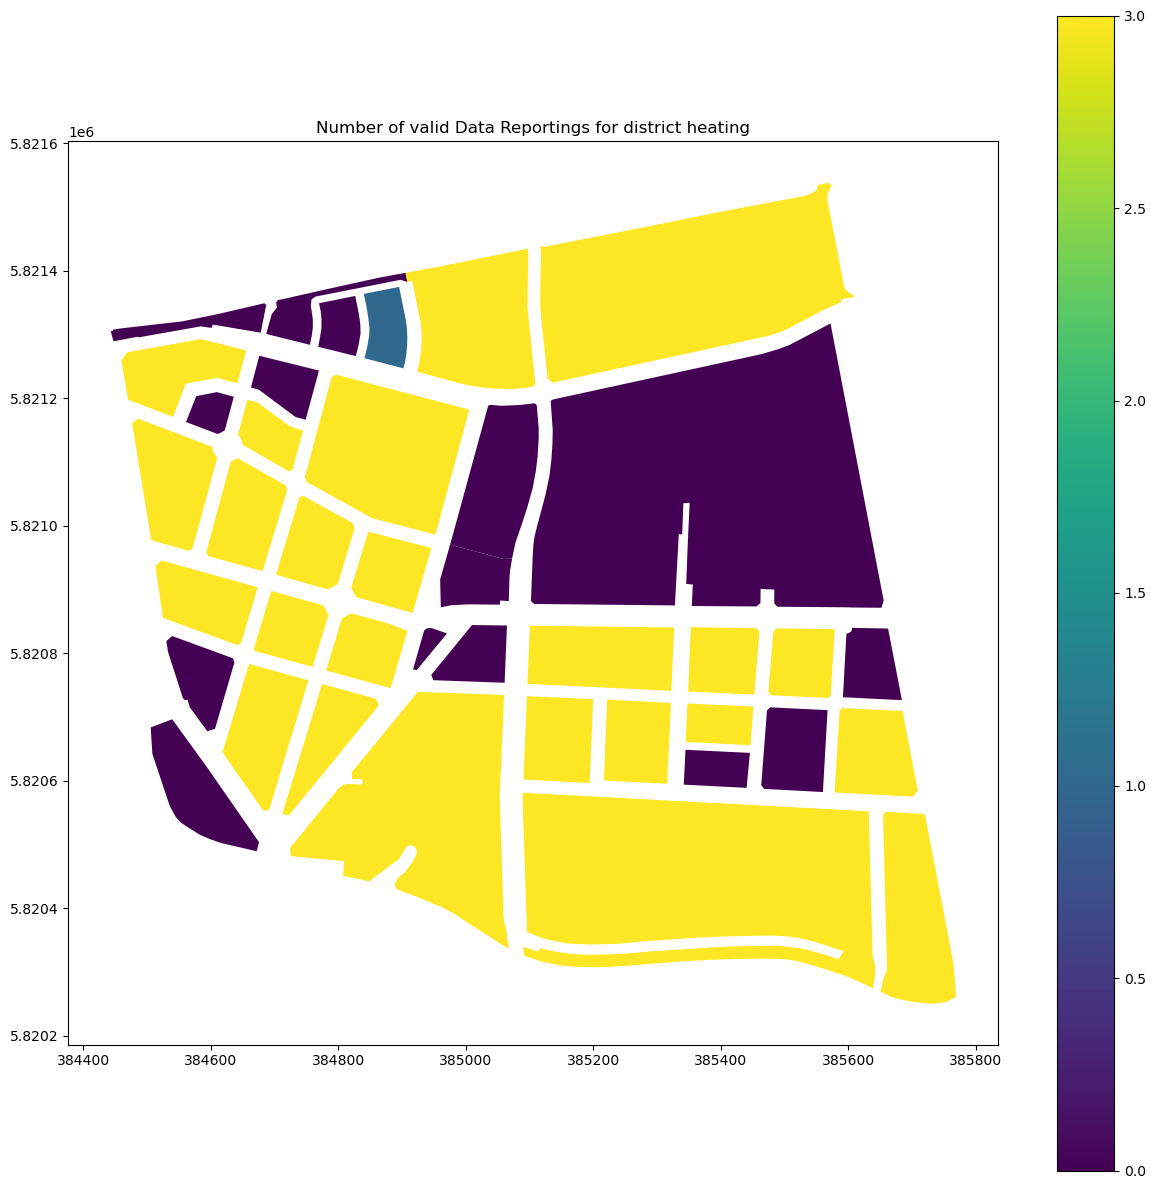

In [69]:

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
district_data.plot(column='valid_entries', ax=ax, legend=True,)
plt.title('Number of valid Data Reportings for district heating')

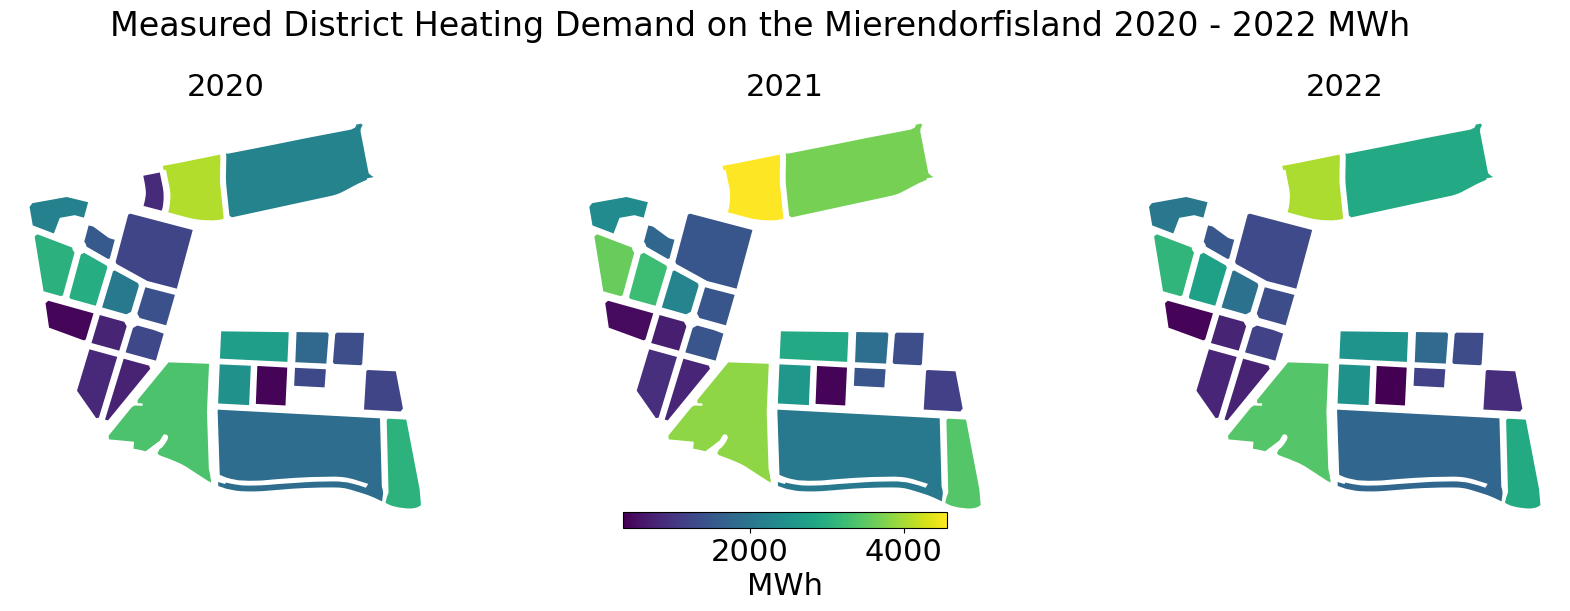

In [111]:
geo_data = district_data

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
norm = Normalize(
    vmin=geo_data[['Fernwärmeverbrauch 2020 [MWh]',
                   'Fernwärmeverbrauch 2021 [MWh]',
                   'Fernwärmeverbrauch 2022 [MWh]']].min().min(),
    vmax=geo_data[['Fernwärmeverbrauch 2020 [MWh]',
                   'Fernwärmeverbrauch 2021 [MWh]',
                   'Fernwärmeverbrauch 2022 [MWh]']].max().max()
)
cmap = plt.cm.viridis
geo_data.plot(column='Fernwärmeverbrauch 2020 [MWh]', ax=axs[0], cmap=cmap, norm=norm)
axs[0].set_title('2020', size=22)
geo_data.plot(column='Fernwärmeverbrauch 2021 [MWh]', ax=axs[1], cmap=cmap, norm=norm)
axs[1].set_title('2021', size=22)
geo_data.plot(column='Fernwärmeverbrauch 2022 [MWh]', ax=axs[2], cmap=cmap, norm=norm)
axs[2].set_title('2022', size=22)
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=axs,
    orientation='horizontal',
    fraction=0.03,
    pad=0.08
)
cbar.set_label('MWh', size=22)
cbar.ax.tick_params(labelsize=22)
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(top=0.99, wspace=0.3)
fig.suptitle(
    'Measured District Heating Demand on the Mierendorfisland 2020 - 2022 MWh',
    fontsize=24,
    y=0.85
)
plt.show()


In [71]:

shape_data["blknr"] = shape_data["blknr"].astype('int64')
elec_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\Elec_Berlin_2020_2022.xls')    
elec_data = elec_data.rename(columns={"Blocknummer": "blknr"})
elec_data_shapes = shape_data.merge(elec_data, on="blknr") 
elec_data_shapes 


,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Stromverbrauch 2022 [MWh],Hinweis 2022,Stromverbrauch 2021 [MWh],Hinweis 2021,Stromverbrauch 2020 [MWh],Hinweis 2020
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",1275.717,-,1264.105,-,1091.895,-
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",1360.709,-,1293.629,-,1037.488,-
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",5499.234,-,5468.668,-,5429.684,-
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",110.793,-,117.57,-,115.702,-
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",173.854,-,180.491,-,182.027,-
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",809.294,-,889.042,-,843.714,-


Text(0.5, 1.0, 'Stromverbrauch 2020 [MWh]')

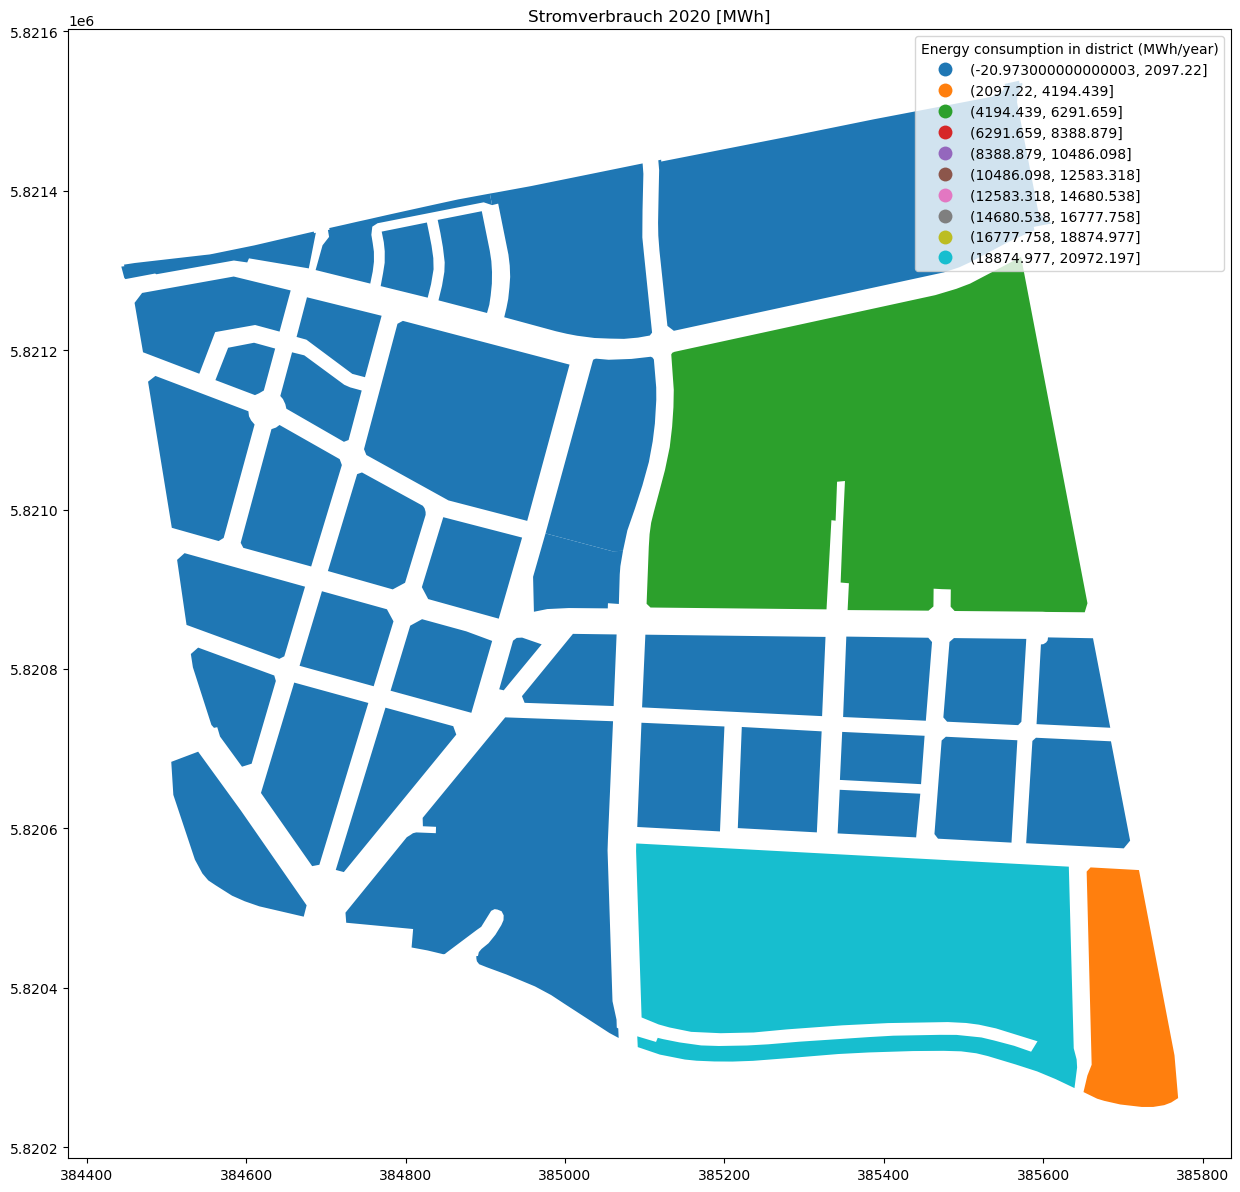

In [73]:
# Create a new column in 'merged_data' with categorical data
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]
elec_data_shapes['category'] = pd.cut(elec_data_shapes['Stromverbrauch 2020 [MWh]'].replace('-', 0), bins=10, include_lowest=True)
# Plotting the map with a colormap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
elec_data_shapes.plot(column='category', ax=ax, legend=True,
                    legend_kwds={'title': "Energy consumption in district (MWh/year)"})
plt.title('Stromverbrauch 2020 [MWh]')

In [74]:
elec_columns_to_check = [
        "Stromverbrauch 2022 [MWh]",
        "Stromverbrauch 2021 [MWh]",
        "Stromverbrauch 2020 [MWh]"
    ]

for column in elec_columns_to_check:
        elec_data_shapes[column] = pd.to_numeric(elec_data_shapes[column], errors='coerce')

elec_data_shapes["valid_entries"] = elec_data_shapes[elec_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
elec_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Stromverbrauch 2022 [MWh],Hinweis 2022,Stromverbrauch 2021 [MWh],Hinweis 2021,Stromverbrauch 2020 [MWh],Hinweis 2020,category,valid_entries
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",1275.717,-,1264.105,-,1091.895,-,"(-20.973000000000003, 2097.22]",3
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",1360.709,-,1293.629,-,1037.488,-,"(-20.973000000000003, 2097.22]",3
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",5499.234,-,5468.668,-,5429.684,-,"(4194.439, 6291.659]",3
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,"(-20.973000000000003, 2097.22]",0
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,"(-20.973000000000003, 2097.22]",0
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,"(-20.973000000000003, 2097.22]",0
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,"(-20.973000000000003, 2097.22]",0
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",110.793,-,117.570,-,115.702,-,"(-20.973000000000003, 2097.22]",3
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",173.854,-,180.491,-,182.027,-,"(-20.973000000000003, 2097.22]",3
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",809.294,-,889.042,-,843.714,-,"(-20.973000000000003, 2097.22]",3


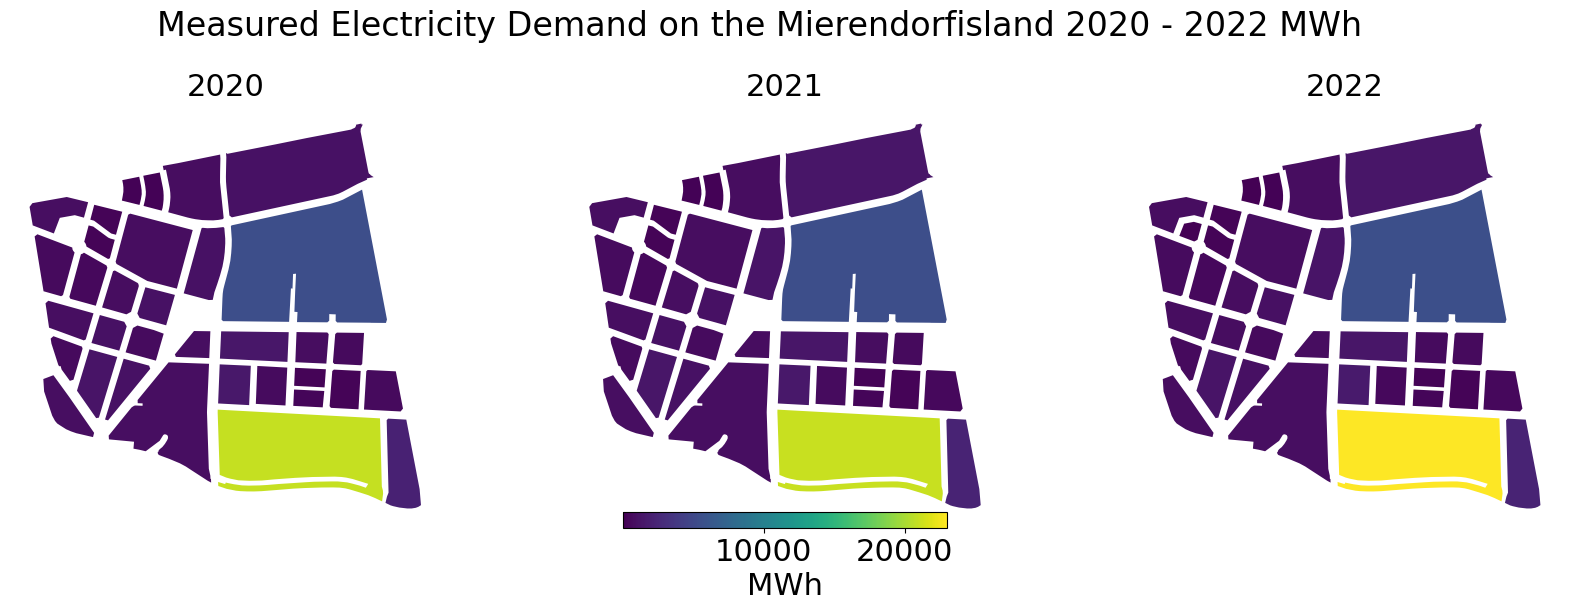

In [112]:
geo_data = elec_data_shapes

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
norm = Normalize(
    vmin=geo_data[['Stromverbrauch 2020 [MWh]',
                   'Stromverbrauch 2021 [MWh]',
                   'Stromverbrauch 2022 [MWh]']].min().min(),
    vmax=geo_data[['Stromverbrauch 2020 [MWh]',
                   'Stromverbrauch 2021 [MWh]',
                   'Stromverbrauch 2022 [MWh]']].max().max()
)
cmap = plt.cm.viridis

geo_data.plot(column='Stromverbrauch 2020 [MWh]', ax=axs[0], cmap=cmap, norm=norm)
axs[0].set_title('2020', size=22)

geo_data.plot(column='Stromverbrauch 2021 [MWh]', ax=axs[1], cmap=cmap, norm=norm)
axs[1].set_title('2021', size=22)

geo_data.plot(column='Stromverbrauch 2022 [MWh]', ax=axs[2], cmap=cmap, norm=norm)
axs[2].set_title('2022', size=22)

cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=axs,
    orientation='horizontal',
    fraction=0.03,
    pad=0.08
)
cbar.set_label('MWh', size=22)
cbar.ax.tick_params(labelsize=22)

for ax in axs:
    ax.axis('off')

plt.subplots_adjust(top=0.99, wspace=0.3)
fig.suptitle(
    'Measured Electricity Demand on the Mierendorfisland 2020 - 2022 MWh',
    fontsize=24,
    y=0.85
)
plt.show()

Text(0.5, 1.0, 'Number of valid Data Reportings for Electricity')

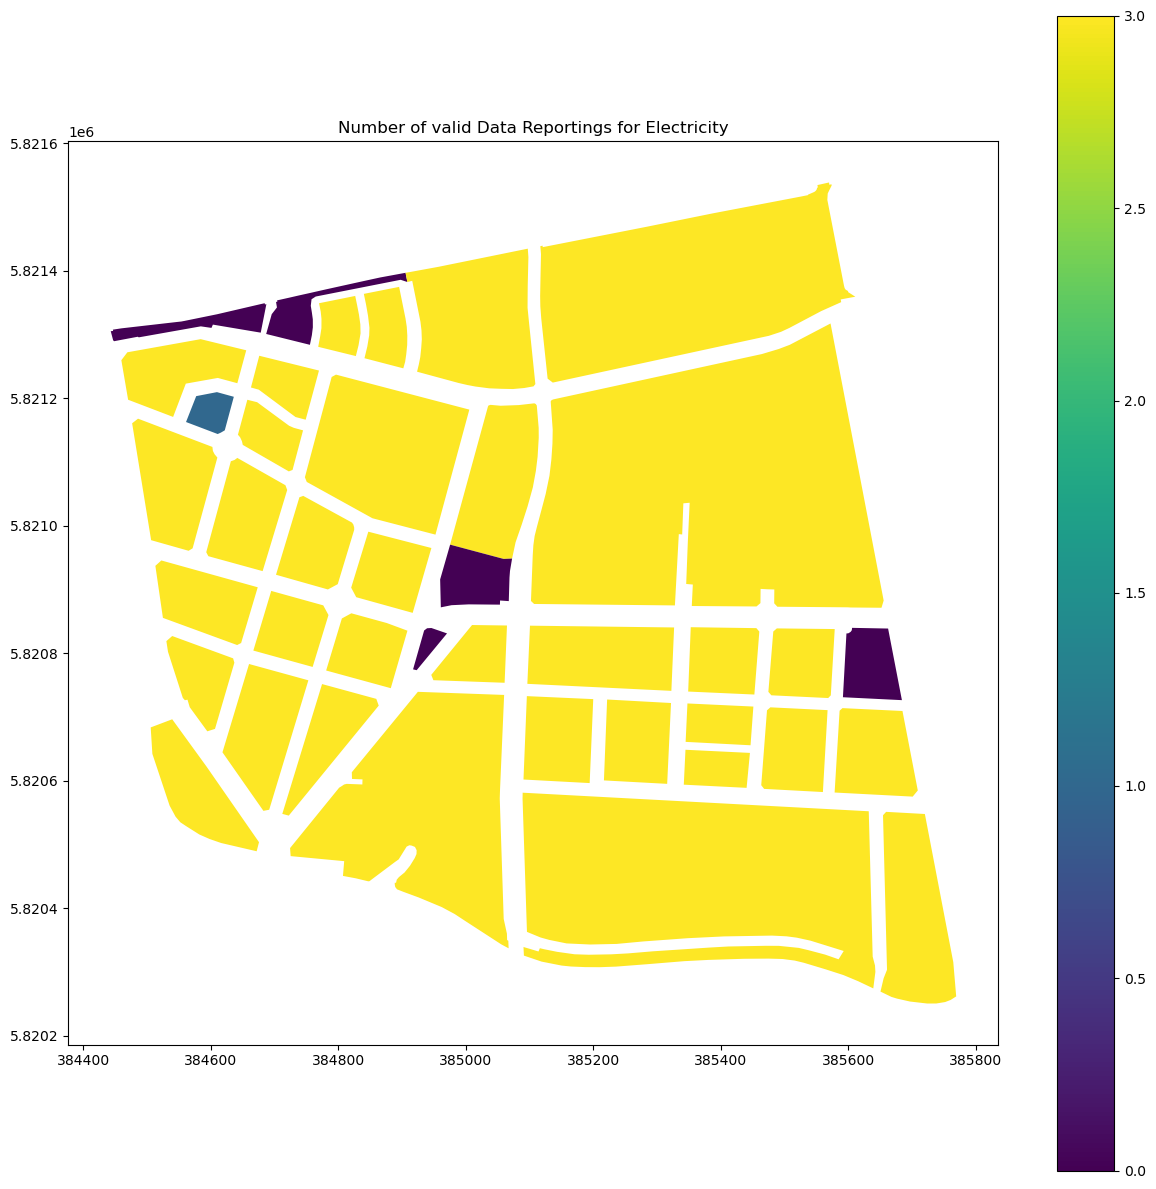

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
elec_data_shapes.plot(column='valid_entries', ax=ax, legend=True,)
plt.title('Number of valid Data Reportings for Electricity')

In [77]:

shape_data['blknr'] = shape_data['blknr'].astype('int64') 
gas_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\Gas_Berlin_2020_2022.xls')    
gas_data = gas_data.rename(columns={"Blocknummer": "blknr"})
gas_data_shapes = shape_data.merge(gas_data, on="blknr") 
gas_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Gasverbrauch 2022 [MWh],Hinweis 2022,Gasverbrauch 2021 [MWh],Hinweis 2021,Gasverbrauch 2020 [MWh],Hinweis 2020
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",1372.379,-,1625.945,-,1301.379,-
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",1581.244,-,1575.34,-,1320.417,-
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",4864.508,-,5671.894,-,5325.49,-
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",34.491,-,57.911,-,43.37,-
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",1266.009,-,1489.637,-,1307.496,-


In [78]:
gas_columns_to_check = [
        "Gasverbrauch 2022 [MWh]",
        "Gasverbrauch 2021 [MWh]",
        "Gasverbrauch 2020 [MWh]"
    ]

for column in gas_columns_to_check:
        gas_data_shapes[column] = pd.to_numeric(gas_data_shapes[column], errors='coerce')

gas_data_shapes["valid_entries"] = gas_data_shapes[gas_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
gas_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Gasverbrauch 2022 [MWh],Hinweis 2022,Gasverbrauch 2021 [MWh],Hinweis 2021,Gasverbrauch 2020 [MWh],Hinweis 2020,valid_entries
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",1372.379,-,1625.945,-,1301.379,-,3
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",1581.244,-,1575.340,-,1320.417,-,3
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",4864.508,-,5671.894,-,5325.490,-,3
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,0
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,0
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,0
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,0
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,0
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",34.491,-,57.911,-,43.370,-,3
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",1266.009,-,1489.637,-,1307.496,-,3


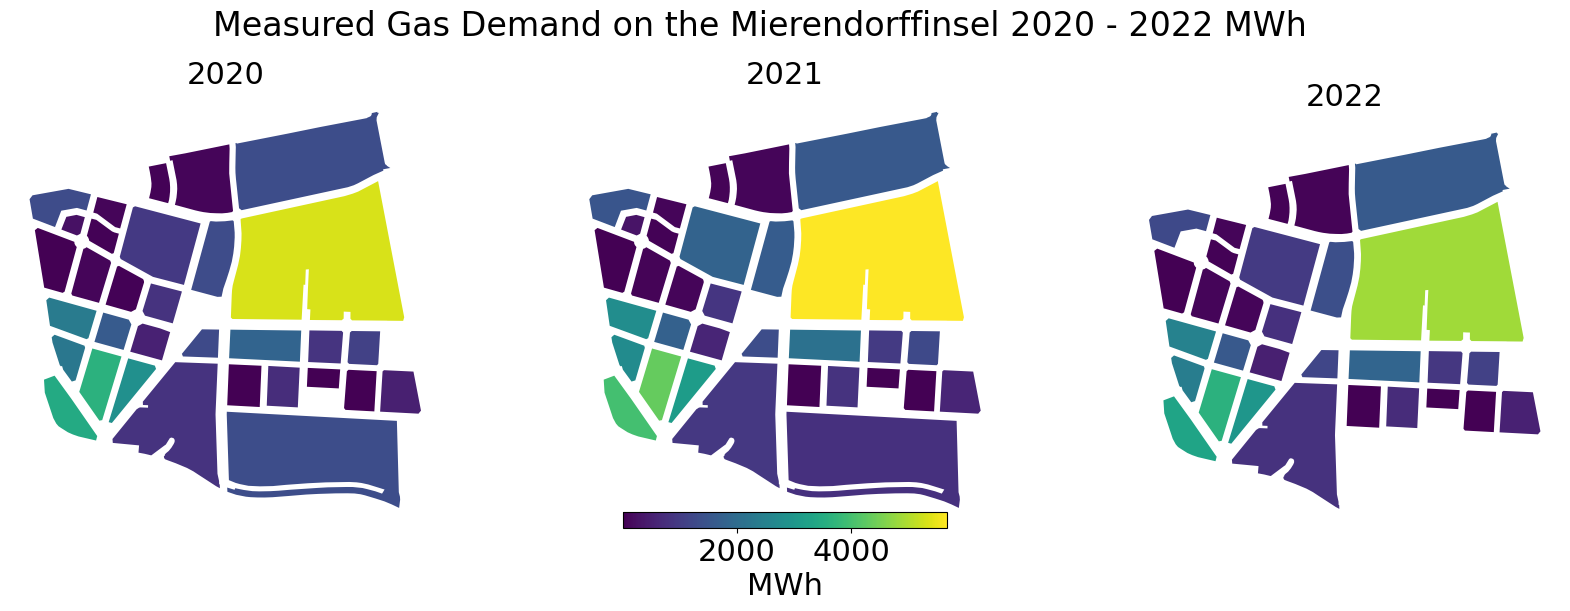

In [113]:
geo_data = gas_data_shapes

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
norm = Normalize(
    vmin=geo_data[['Gasverbrauch 2020 [MWh]', 'Gasverbrauch 2021 [MWh]', 'Gasverbrauch 2022 [MWh]']].min().min(),
    vmax=geo_data[['Gasverbrauch 2020 [MWh]', 'Gasverbrauch 2021 [MWh]', 'Gasverbrauch 2022 [MWh]']].max().max()
)
cmap = plt.cm.viridis

geo_data.plot(column='Gasverbrauch 2020 [MWh]', ax=axs[0], cmap=cmap, norm=norm)
axs[0].set_title('2020', size=22)

geo_data.plot(column='Gasverbrauch 2021 [MWh]', ax=axs[1], cmap=cmap, norm=norm)
axs[1].set_title('2021', size=22)

geo_data.plot(column='Gasverbrauch 2022 [MWh]', ax=axs[2], cmap=cmap, norm=norm)
axs[2].set_title('2022', size=22)

cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=axs,
    orientation='horizontal',
    fraction=0.03,
    pad=0.08
)
cbar.set_label('MWh', size=22)
cbar.ax.tick_params(labelsize=22)

for ax in axs:
    ax.axis('off')

plt.subplots_adjust(top=0.99, wspace=0.3)
fig.suptitle(
    'Measured Gas Demand on the Mierendorffinsel 2020 - 2022 MWh',
    fontsize=24,
    y=0.85
)
plt.show()


In [80]:
# Prepare data for district Heating
shape_data['blknr'] = shape_data['blknr'].astype('int64') 
dh_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\DH_Berlin_2020_2022.xls')    
dh_data = dh_data.rename(columns={"Blocknummer": "blknr"})
dh_data_shapes = shape_data.merge(dh_data, on="blknr") 
dh_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh]
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",-,-,-
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",2896.681,3684.376,2229.792
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",-,-,-
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",-,-,-
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",-,-,-
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",-,-,-
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",-,-,-
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",-,-,-
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",-,-,851.346
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",2035.49,2359.61,2184.202


In [81]:
dh_columns_to_check = [
        "Fernwärmeverbrauch 2022 [MWh]",
        "Fernwärmeverbrauch 2021 [MWh]",
        "Fernwärmeverbrauch 2020 [MWh]"
    ]

for column in dh_columns_to_check:
        dh_data_shapes[column] = pd.to_numeric(dh_data_shapes[column], errors='coerce')

dh_data_shapes["valid_entries"] = dh_data_shapes[dh_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
dh_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],valid_entries
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",NaN,NaN,NaN,0
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",2896.681,3684.376,2229.792,3
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",NaN,NaN,NaN,0
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",NaN,NaN,NaN,0
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",NaN,NaN,NaN,0
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",NaN,NaN,NaN,0
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",NaN,NaN,NaN,0
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",NaN,NaN,NaN,0
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",NaN,NaN,851.346,1
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",2035.490,2359.610,2184.202,3


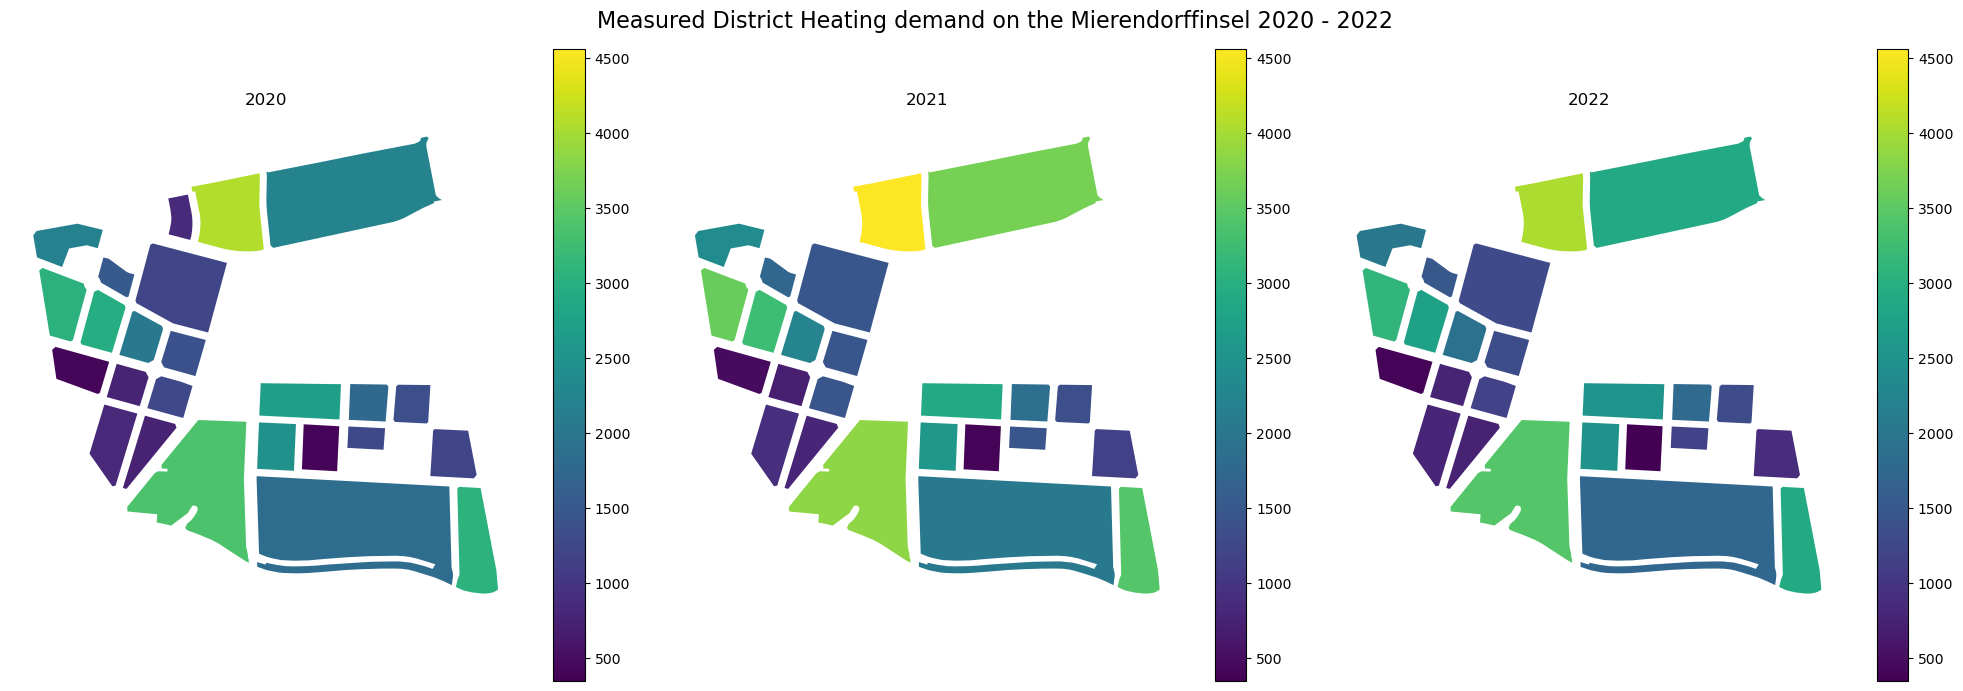

In [82]:
geo_data = dh_data_shapes

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Define a normalization for the color mapping
norm = Normalize(vmin=geo_data[dh_columns_to_check].min().min(),
                 vmax=geo_data[dh_columns_to_check].max().max())

# Create the color map
cmap = plt.cm.viridis

# Plotting Stromverbrauch 2020
geo_data.plot(column='Fernwärmeverbrauch 2020 [MWh]', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('2020')

# Plotting Stromverbrauch 2021
geo_data.plot(column='Fernwärmeverbrauch 2021 [MWh]', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('2021')

# Plotting Stromverbrauch 2022
geo_data.plot(column='Fernwärmeverbrauch 2022 [MWh]', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('2022')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)


# Add a common title
fig.suptitle('Measured District Heating demand on the Mierendorffinsel 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Number of valid Data Reportings for Gas')

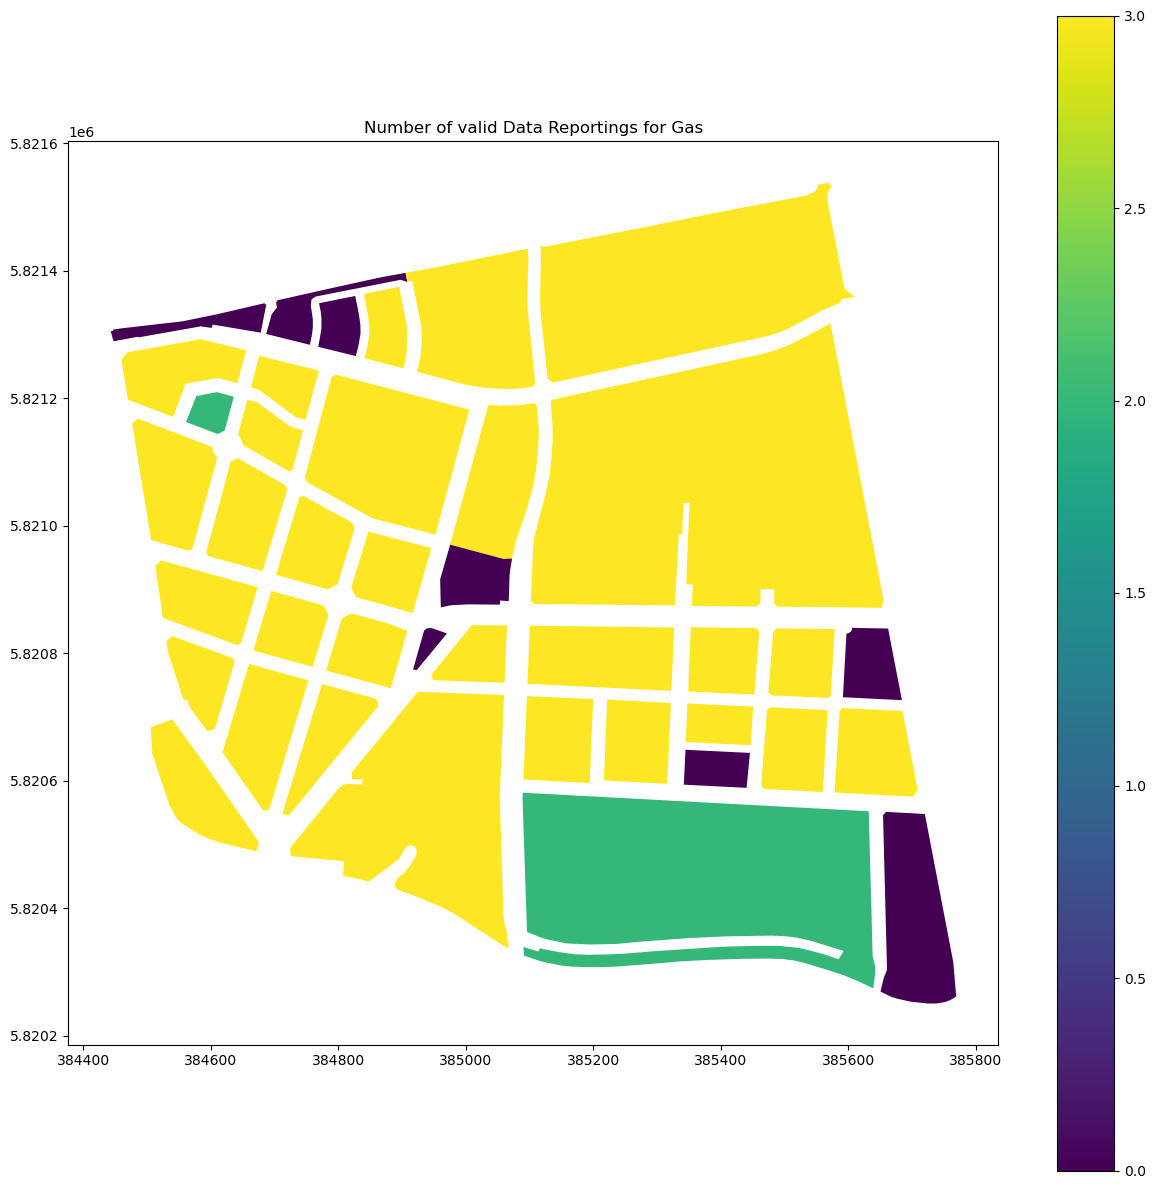

In [83]:

gas_columns_to_check = [
        "Gasverbrauch 2022 [MWh]",
        "Gasverbrauch 2021 [MWh]",
        "Gasverbrauch 2020 [MWh]"
    ]

for column in gas_columns_to_check:
        gas_data_shapes[column] = pd.to_numeric(gas_data_shapes[column], errors='coerce')

gas_data_shapes["valid_entries"] = gas_data_shapes[gas_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gas_data_shapes.plot(column='valid_entries', ax=ax, legend=True,)
plt.title('Number of valid Data Reportings for Gas')

In [84]:

inh_shapes = shape_data.copy()
inh_shapes["blknr"] = inh_shapes["blknr"].astype('int64') 

# Define the directory path
par_dir_path = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))


for year in ["2020", "2021", "2022"]:
    file_path = os.path.join(par_dir_path, 'data', 'berlin', f"03_Inhabitants{year}.csv")
    df = pd.read_csv(file_path)
    reduced_df = df[["blknr", f"ew{year}"]]
    inh_shapes = inh_shapes.merge(reduced_df, on='blknr', how='left')

inh_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,ew2020,ew2021,ew2022
0,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",6.0,9.0,9
1,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",0.0,0.0,0
2,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",0.0,3.0,3
3,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",6.0,9.0,9
4,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",0.0,0.0,0
5,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",0.0,0.0,0
6,20021,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,5655.184570,1994/11/24 00:00:00.000,"POLYGON ((384755.681 5821283.555, 384687.109 5...",0.0,823.0,0
7,20022,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,4956.509277,1994/11/24 00:00:00.000,"POLYGON ((384768.721 5821280.407, 384771.728 5...",243.0,240.0,222
8,20023,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,6848.019531,1994/11/24 00:00:00.000,"POLYGON ((384840.296 5821363.439, 384895.602 5...",233.0,222.0,235
9,20027,04,Charlottenburg-Wilmersdorf,04300517,Block,100-999 Einwohner,14053.184570,1993/06/30 00:00:00.000,"POLYGON ((384469.374 5821271.803, 384584.360 5...",730.0,715.0,723


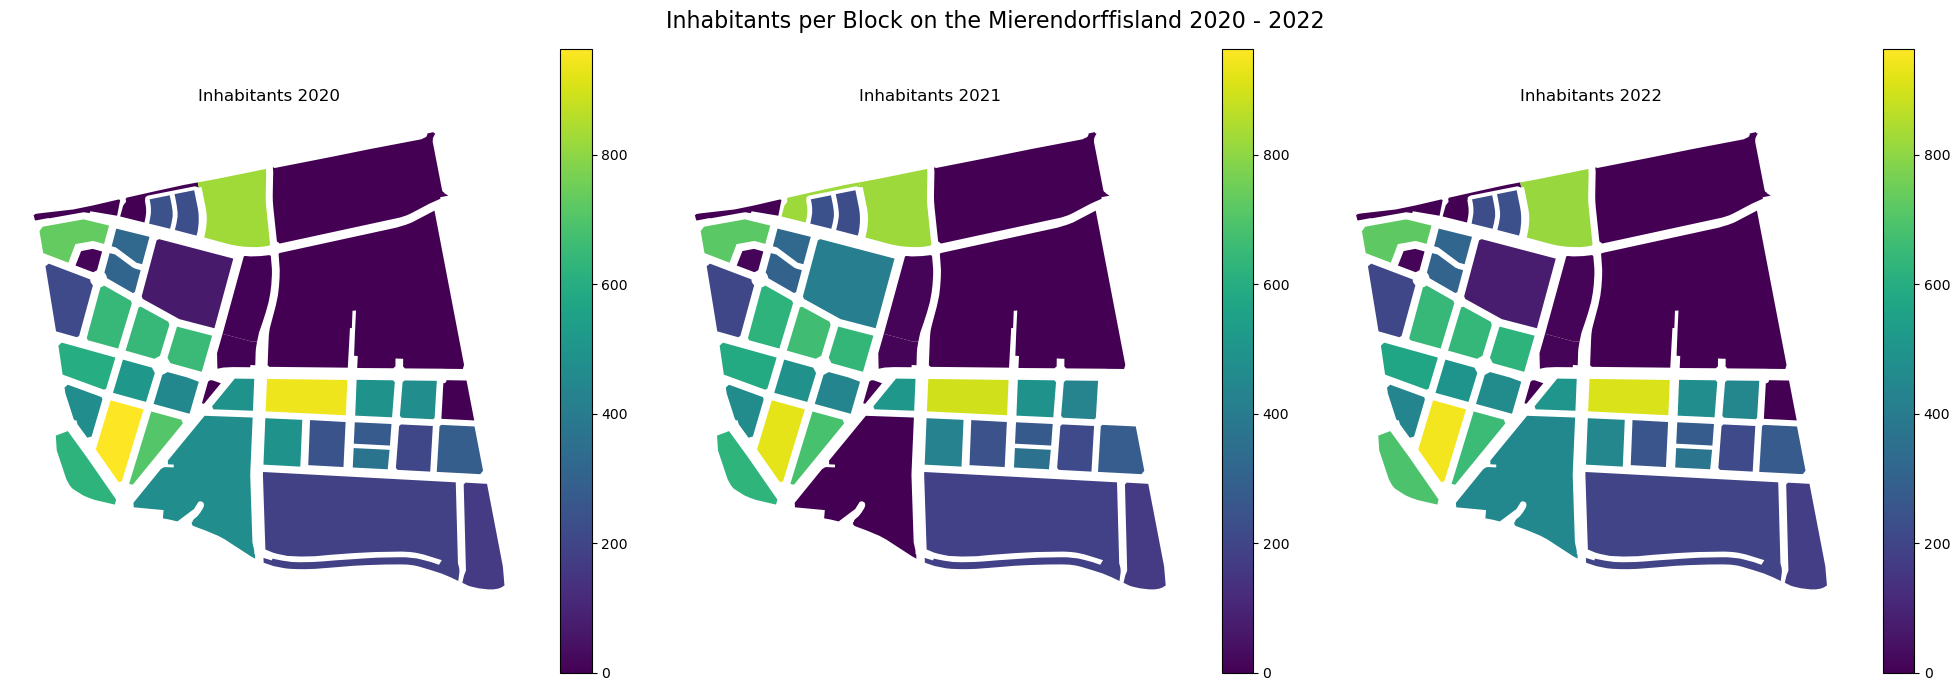

In [85]:
geo_data = inh_shapes


fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns


norm = Normalize(vmin=geo_data[["ew2020",	"ew2021",	"ew2022"]].min().min(),
                 vmax=geo_data[["ew2020",	"ew2021",	"ew2022"]].max().max())


cmap = plt.cm.viridis


geo_data.plot(column='ew2020', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('Inhabitants 2020')


geo_data.plot(column='ew2021', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('Inhabitants 2021')


geo_data.plot(column='ew2022', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('Inhabitants 2022')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)


# Add a common title
fig.suptitle('Inhabitants per Block on the Mierendorffisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout()


In [86]:

inh_shapes = shape_data.copy()
inh_shapes["blknr"] = inh_shapes["blknr"].astype('int64') 
file_path_age = os.path.join(par_dir_path, 'data', 'berlin', 'DistrictLevelData.csv') 
age_df = pd.read_csv(file_path_age)
bldg_age_shapes =  inh_shapes.merge(age_df, on='blknr') 

In [87]:
bldg_age_shapes.columns

Index(['blknr', 'bez_x', 'bezname_x', 'plr_x', 'blktypname_x', 'ewk_x',
       'area_x', 'datum_x', 'geometry', 'bez_y', 'bezname_y', 'plr_y',
       'blktypname_y', 'ewk_y', 'area_y', 'datum_y', 'ueberw_dek',
       'freistehen', 'doppelhaus', 'gereihtes', 'anderertyp', 'x_bis_1900',
       'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940', 'x1941_1950',
       'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990', 'x1991_2000',
       'x2001_2010', 'x2011_2015', 'ew2015', 'typ', 'typklar',
       'dh_consumption_mwh2022', 'dh_consumption_mwh_2021',
       'dh_consumption_mwh_2020', 'blknr_2', 'bez_2', 'bezname_2', 'plr_2',
       'blktypna_1', 'ewk_2', 'area_2', 'datum_2', 'fid_x',
       'el_consumption_mwh_2022', 'el_excluded_2022',
       'el_consumption_mwh_2020', 'el_excluded_2020',
       'el_consumption_mwh_2021', 'el_excluded_2021', 'fid_y',
       'gas_consumption_mwh_2022', 'gas_excluded_2022',
       'gas_consumption_mwh_2021', 'gas_excluded_2021',
       'gas_consum

Text(0.5, 1.0, 'Major building age group for residential buildings')

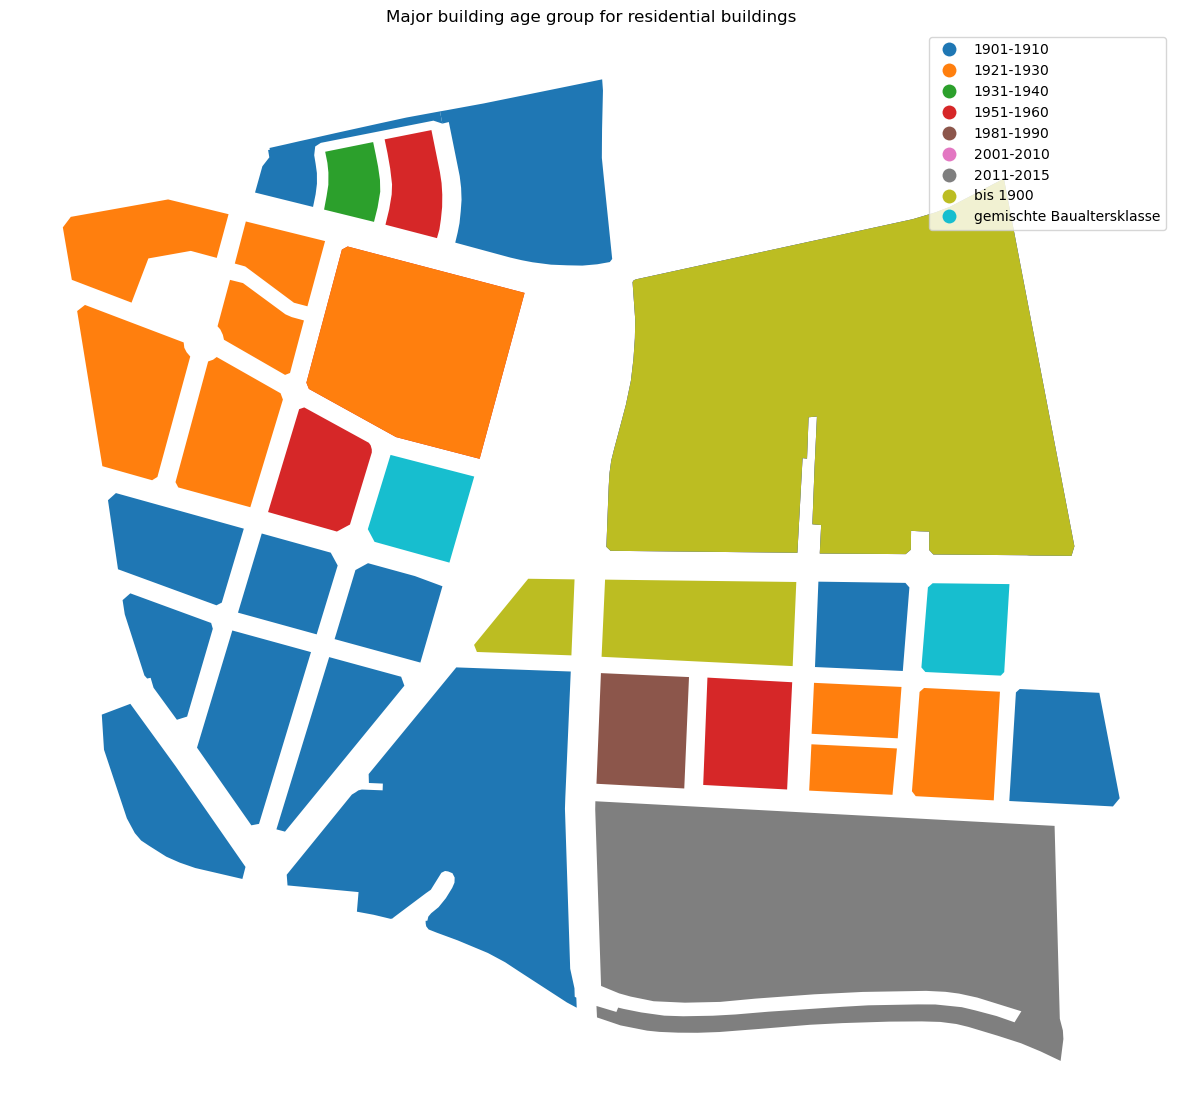

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
bldg_age_shapes.plot(column='ueberw_dek', ax=ax, legend=True,)
ax.axis('off')
plt.title('Major building age group for residential buildings')

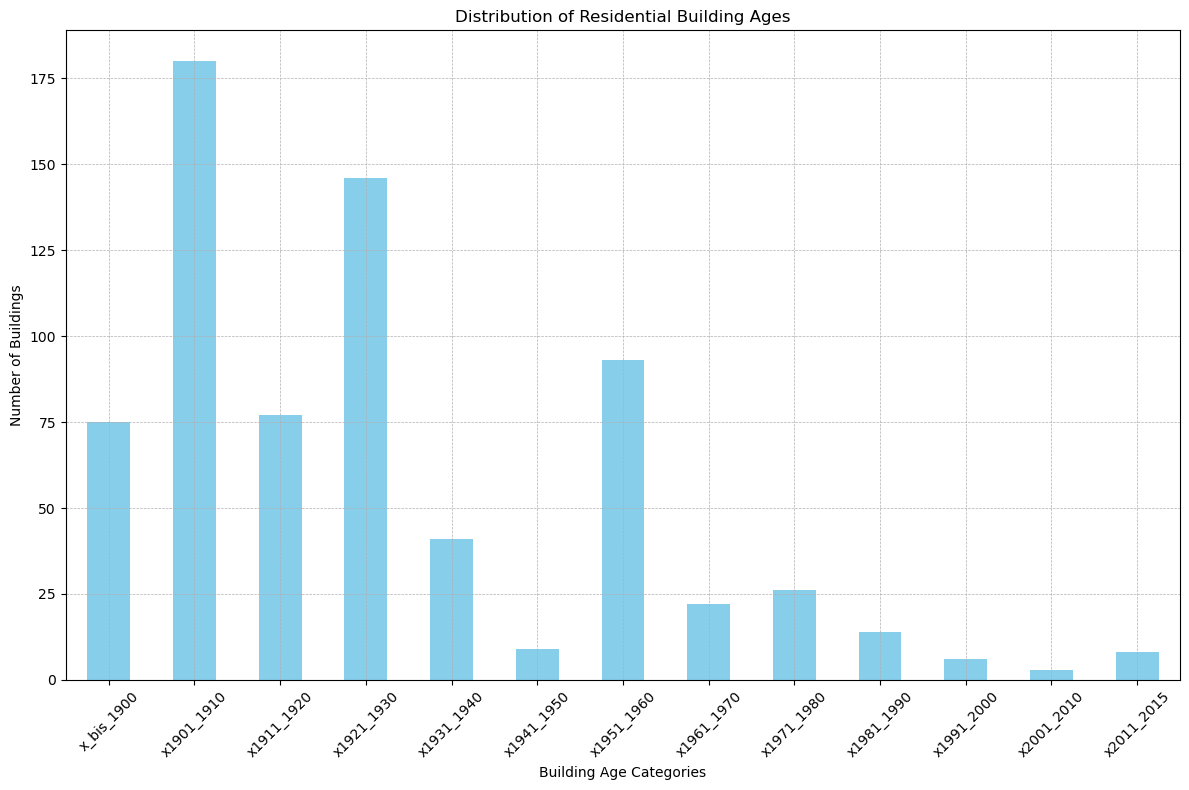

In [89]:
# Aggregate the total number of buildings in each age category
age_columns = [
    'x_bis_1900', 'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940', 
    'x1941_1950', 'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990', 
    'x1991_2000', 'x2001_2010', 'x2011_2015'
]
age_totals = bldg_age_shapes[age_columns].sum()

# Create a bar chart
plt.figure(figsize=(12, 8))
age_totals.plot(kind='bar', color='skyblue')
plt.title('Distribution of Residential Building Ages')
plt.xlabel('Building Age Categories')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()